In [2]:
import pathlib
from typing import Dict
from typing_extensions import Literal

import jax.numpy as jnp
import numpy as np

from kmeans_jax.kmeans_in_practice import (
    plot_kmeans_in_practice_loss_results,
    plot_kmeans_in_practice_nmi_results,
    run_kmeans_in_practice_experiments,
)

In [3]:
def run_experiments(
    init_method: Literal["random_centers", "random_partition", "kmeans++"],
    path_to_output: str | pathlib.Path,
) -> Dict[str, np.ndarray]:
    prior_variance = 1.0
    size_cluster1 = 20
    size_cluster2 = 20

    n_experiments = 100
    num_pca_components = 4
    dimension_vals = jnp.logspace(0.8, 7, 15, dtype=int)[:11]
    noise_variance_vals = np.linspace(2.0, 6.0, 10) ** 2

    results = run_kmeans_in_practice_experiments(
        dimension_vals,
        noise_variance_vals,
        prior_variance,
        size_cluster1,
        size_cluster2,
        n_experiments,
        num_pca_components,
        init_method=init_method,
        path_to_output=path_to_output,
        max_iters=100,
        seed=0,
    )
    return results

In [4]:
results_random_centers = jnp.load(
    "../results/kmeans_in_practice/results_random_centers.npz",
    allow_pickle=True,
)

results_random_partition = jnp.load(
    "../results/kmeans_in_practice/results_random_partition.npz",
    allow_pickle=True,
)

results_kmeanspp = jnp.load(
    "../results/kmeans_in_practice/results_kmeanspp.npz",
    allow_pickle=True,
)

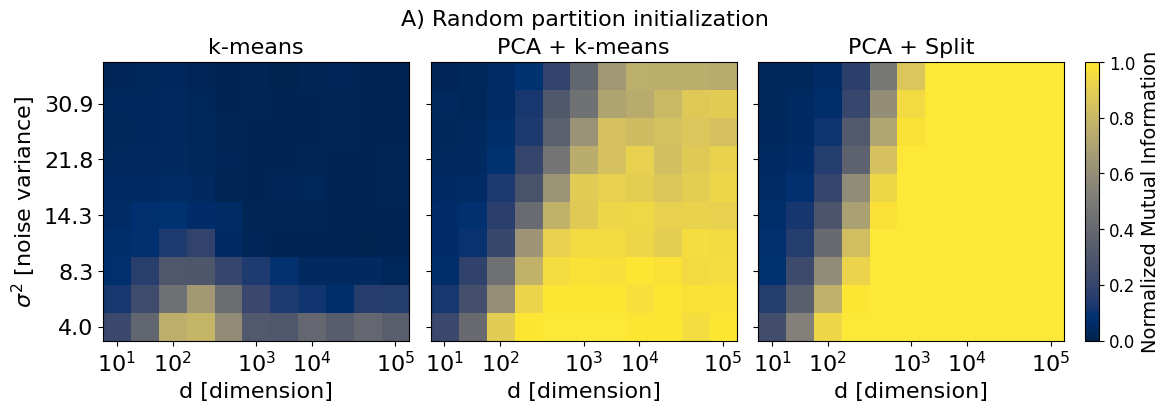

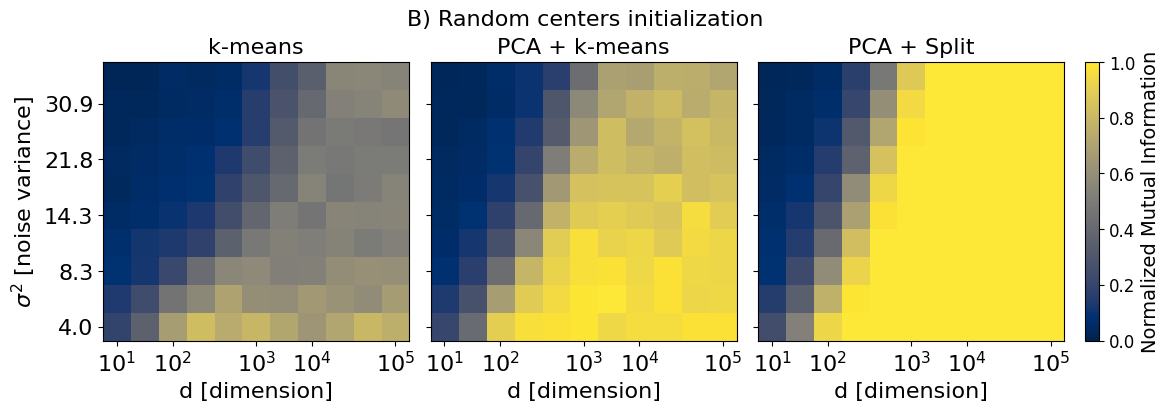

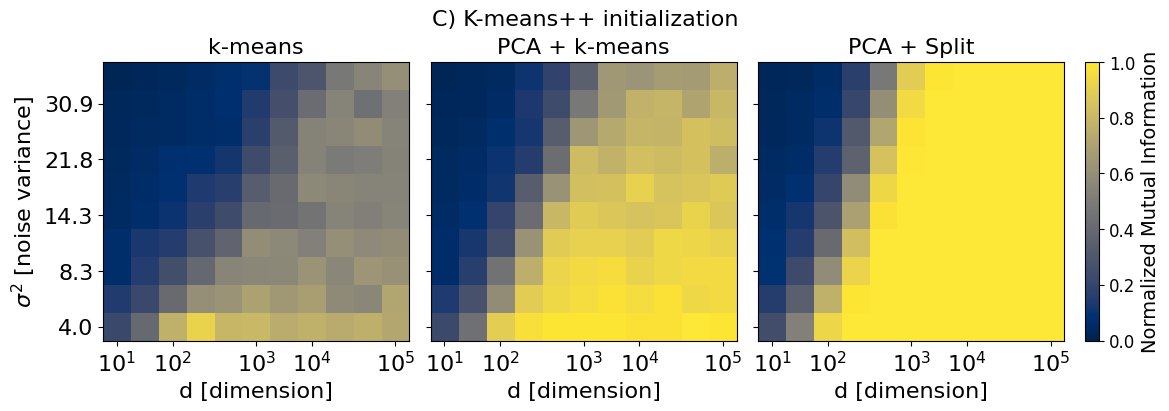

In [5]:
fig, ax = plot_kmeans_in_practice_nmi_results(
    results_random_partition, fig_suptitle="A) Random partition initialization"
)
fig, ax = plot_kmeans_in_practice_nmi_results(
    results_random_centers, fig_suptitle="B) Random centers initialization"
)

fig, ax = plot_kmeans_in_practice_nmi_results(
    results_kmeanspp, fig_suptitle="C) K-means++ initialization"
)

(<Figure size 1500x400 with 4 Axes>,
 array([<Axes: title={'center': 'k-means'}, xlabel='d [dimension]', ylabel='$\\sigma^2$ [noise variance]'>,
        <Axes: title={'center': 'PCA + k-means'}, xlabel='d [dimension]'>,
        <Axes: title={'center': 'PCA + Split'}, xlabel='d [dimension]'>],
       dtype=object))

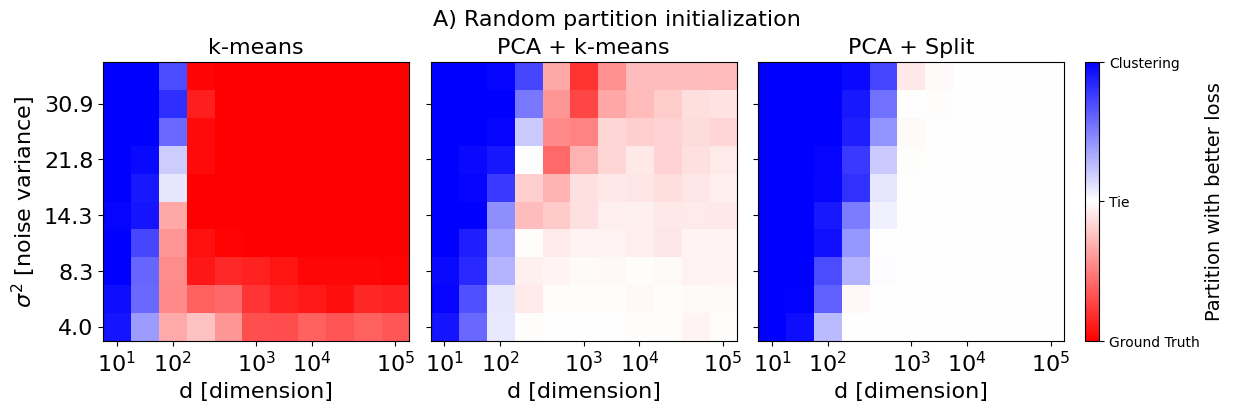

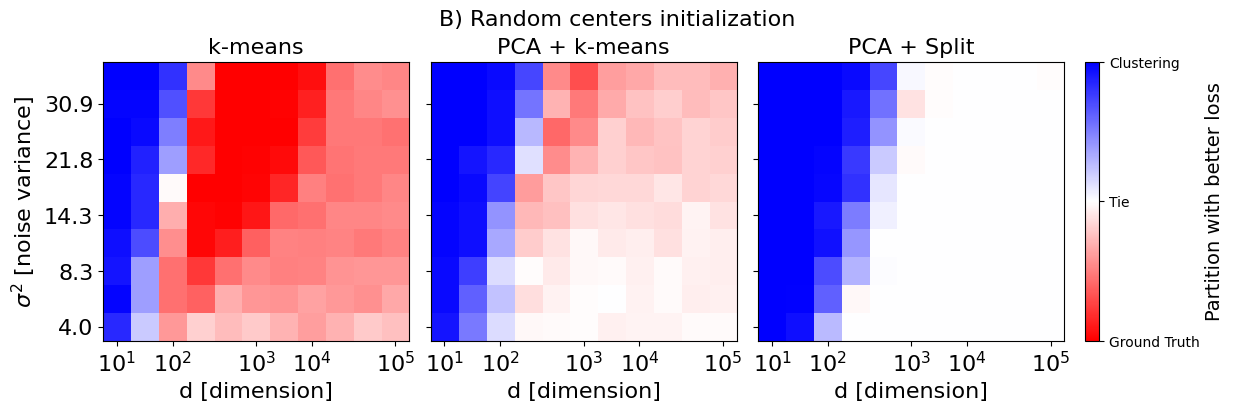

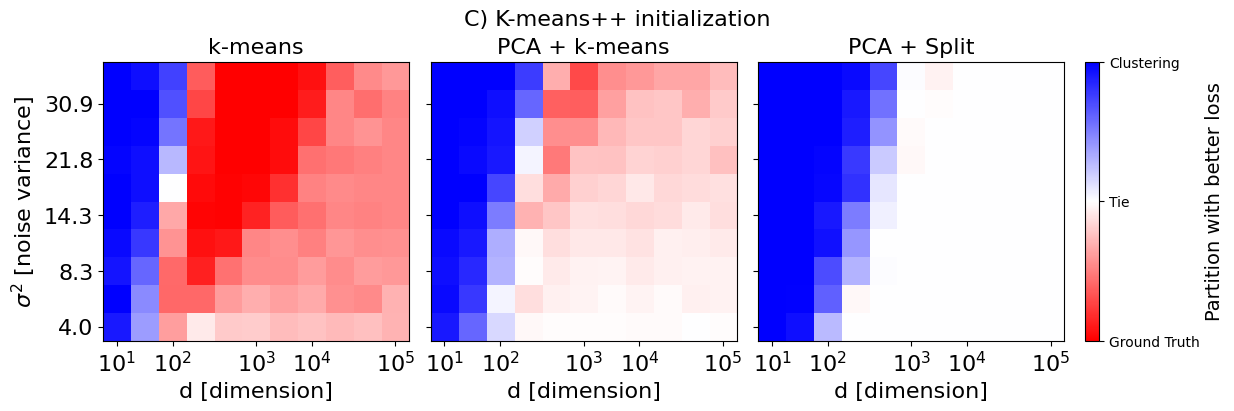

In [6]:
plot_kmeans_in_practice_loss_results(
    results_random_partition,
    fig_suptitle="A) Random partition initialization",
)
plot_kmeans_in_practice_loss_results(
    results_random_centers,
    fig_suptitle="B) Random centers initialization",
)
plot_kmeans_in_practice_loss_results(
    results_kmeanspp,
    fig_suptitle="C) K-means++ initialization",
)